In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
%matplotlib inline
sns.set()

In [18]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
train_images /= 255
test_images /= 255

In [21]:
train_images.shape

(60000, 28, 28, 1)

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_2 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [53]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             matrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=2,batch_size=10,
                   validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 65s 2ms/sample - loss: 0.0235 - val_loss: 0.0298
Epoch 2/2
40199/40199 [==============================] - 67s 2ms/sample - loss: 0.0195 - val_loss: 0.0315


9


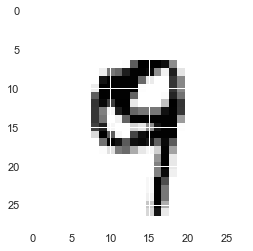

In [30]:
image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [31]:
model

['loss']

<bound method Model.get_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001EC2153E148>>